In [33]:
import json
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [4]:
#Import Json file into a list 
with open('1.1_wiki_results.json', 'r') as json_file:
    json_data = json.load(json_file)

In [5]:
# Convert JSON data to DataFrame
df = pd.DataFrame(list(json_data.items()), columns=['Company', 'Company description'])

## Deep cleansing the text is critical for results with classical ML algorithms 

The removal of certain types of words, including substantives (nouns) and other custom unnecessary words, is essential for several reasons:

- Reducing Noise: Named Entity Recognition (NER) is a crucial step in the text processing pipeline, especially when performing text classification tasks. NER helps in identifying and extracting entities such as names of people, organizations, locations, etc. By removing these entities, you reduce noise in the text data, focusing on the more generic and essential language components. Unnecessary words, which might include common generic terms like "company," "business," or other stopwords, can also add noise to the data and reduce the signal-to-noise ratio.

- Improved Generalization: Text classification models aim to generalize patterns from the training data to make predictions on new, unseen data. Removing named entities and unnecessary words helps the model focus on the core language structure and common terms shared across different documents. This improves the model's ability to generalize to new instances and perform well on unseen data.

- Enhancing Feature Relevance: Named entities often represent specific instances or entities that may not contribute significantly to the overall classification of documents. By removing them, the model can focus on more informative and relevant features, such as the common themes, topics, and language patterns that are indicative of specific classes or categories.

- Mitigating Data Sparsity: In the context of text classification, the data can be sparse, meaning that each document contains only a subset of the possible words in the entire vocabulary. By removing named entities and unnecessary words, you reduce the dimensionality of the feature space and help mitigate data sparsity. This can lead to more robust models, especially when dealing with limited training data.

In summary, the removal of named entities and unnecessary words through NER and custom stopword lists is a preprocessing step that contributes to the overall effectiveness of text classification models by reducing noise, improving generalization, enhancing feature relevance, mitigating data sparsity, and producing more interpretable results.

In [68]:
# Extracting entities through NER with NLTK from any given corpus for then to be removed
named_entities = []
text = ' '.join(df['Company description'])
nes = nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(text)))
for ne in nes:
    if type(ne) is nltk.tree.Tree:
        if (ne.label() == 'GPE' or ne.label() == 'PERSON' or ne.label() == 'ORGANIZATION'):
            l = []
            for i in ne.leaves():
                l.append(i[0])
            s = u' '.join(l)
            if not (s in named_entities):
                named_entities.append(s.lower())
print(named_entities)

['rock hill', 'south carolina', 'minnesota mining', 'american', 'smith corporation', 'american', 'north america', 'asian', 'north america', 'bengaluru', 'india', 'nanjing', 'china', 'smith', 'a10 networks', 'american', 'lee chen', 'foundry networks', 'a10', 'id series', 'ex series', 'aar', 'wood dale', 'illinois', 'chicago', "o'hare international airport", 'aaron', 'company', 'american', 'abbott laboratories', 'american', 'abbott park', 'illinois', 'united states', 'chicago', 'wallace calvin abbott', 'abbvie', 'pedialyte', 'similac', 'binaxnow', 'ensure', 'glucerna', 'zo', 'abbvie inc.', 'american', 'north chicago', 'illinois', 'humira', 'crohn', 'skyrizi', 'il abercrombie', 'fitch', 'american', 'new albany', 'ohio', 'abercrombie kids', 'hollister co.', 'gilly hicks', 'abm industries inc.', 'united states', 'morris rosenberg', 'san francisco', 'california', 'accenture', 'dublin', 'accenture', 'fortune', 'fortune', 'accenture', 'sweet', 'ceo', 'accenture', 'acco brands corporation', 'am

In [60]:
# Function to generate and display word cloud with ALL the words of the selected text to be analized 
def generate_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

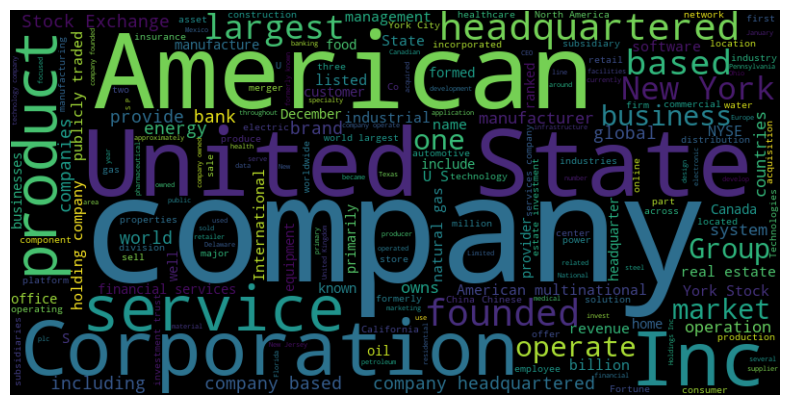

In [61]:
# Generate and display the word cloud
generate_wordcloud(text)

Generating a list of words observed in the wordcloud potentially not leading to helpful classification for being present in rather most descriptions. These words will be added to regular stopwords and NER-identified words to remove from the text corpus prior to atempt any classification task. 

In [69]:
custom_stopwords = ["company", "business", "headquartered", "provider", "american", "chinese", "multinational",
                    "headquarters","operating","operates","operated", "fields", "produces", "brands", "including", "products",
                    "services", "industry", "market", "global", "worldwide", "offers", "founded", "founder",
                    "specializing", "public", "private", "specializes", "originally", "located", "subsidiaries",
                    "established", "known", "industry", "markets", "operations", "known", "founded", "founding",
                    "united", "provides", "solutions", "founded", "corporation", "corporate", "subsidiary",
                    "organization", "enterprise", "establishment", "corporate", "industry-leading", "leading",
                    "innovative", "innovation", "leading-edge", "cutting-edge", "first", "focused", "independent",
                    "leading", "industry-leading", "leading", "innovative", "innovation", "billion", "employ",
                    "december", "location", "office", "around", "approximately", "innovative", "primary",
                    "innovation", "publicly", "primarily", "world-class", "owned", "businesses", "location",
                    "operate", "worlds", "holding", "million", "exchange", "online", "employee", "major", "offices",
                    "york", "firm", "owns", "accross", "traded", "material", "previously", "september",
                     "companys", "based", "countries", "formerly", "stock", "include"]

In [70]:
# Function to clean text
def clean_text(text):
    # Remove non-alphanumeric characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())
    # Remove stopwords
    stop_words = set(stopwords.words('english') + named_entities + custom_stopwords)
    words = word_tokenize(text)
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)


In [71]:
# Apply text cleaning to the 'Company description' column
df['Cleaned Description'] = df['Company description'].apply(clean_text)
df.head(2)

,Company,Company description,Cleaned Description
0,3D Systems,"3D Systems, headquartered in Rock Hill, South ...",carolina engineers manufactures sells printers...
1,3M,3M Company (originally the Minnesota Mining an...,mining manufacturing conglomerate worker healt...


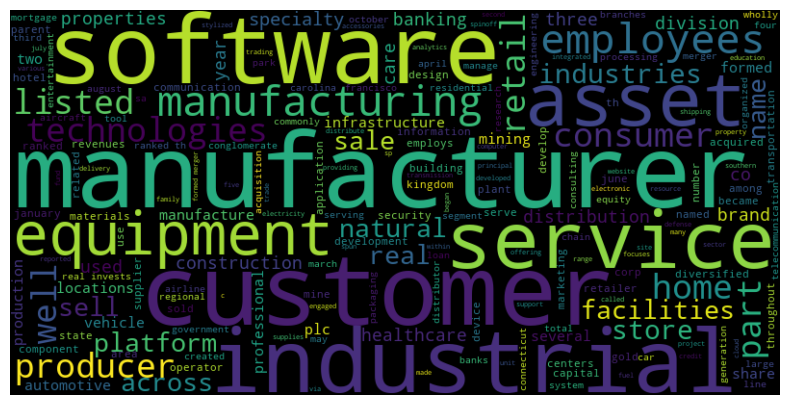

In [72]:
text2 = ' '.join(df['Cleaned Description'])
generate_wordcloud(text2)

In [74]:
df.to_csv('2_results_cleansed.csv', index=False)